In [1]:
import gzip
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

# Path to your file
file_path = "../bay_area_network.pkl.gz"

# Load the graph
with gzip.open(file_path, "rb") as f:
    G = pickle.load(f)

# Get the graph from the network key
graph = G["network"]

# Print basic network statistics
print("Network Statistics:")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

Network Statistics:
Number of nodes: 50575
Number of edges: 129395


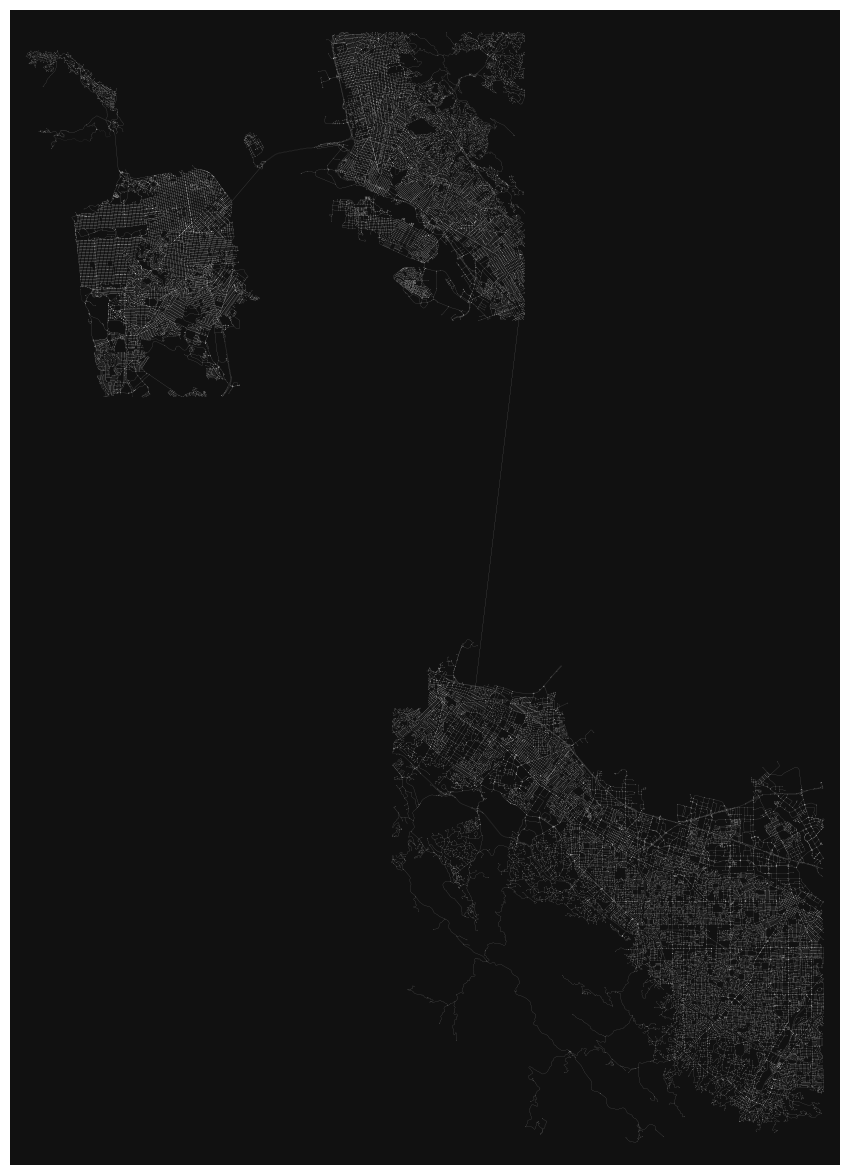

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [2]:
ox.plot_graph(graph, node_size=0.07, edge_linewidth=0.05,figsize=(15,15))

In [3]:
def visualize_network(network):
    
    
    # 1. Initialize the NetworkDatabase and load the network
    

    print(f"Network loaded successfully! Nodes: {network.number_of_nodes()}, Edges: {network.number_of_edges()}")

    # 2. Visualize the graph
    print("Generating visualization...")
    try:
        # Define some plotting parameters
        fig, ax = ox.plot_graph(
            network,
            filepath=None,  # Set a filepath like 'san_francisco_map.png' to save the file
            node_size=0.07,    # Don't plot nodes for cleaner road visualization
            edge_linewidth=0.05,
            #edge_color="#555555",
            #bgcolor='w',      # White background
            show=True,      # Display the plot
            close=True,     # Close the plot window after displaying
            save=False      # Don't save the file (change to True to save)
        )
        print("Visualization complete.")

    except Exception as e:
        print(f"Error during visualization: {e}")

Network loaded successfully! Nodes: 50575, Edges: 129395
Generating visualization...


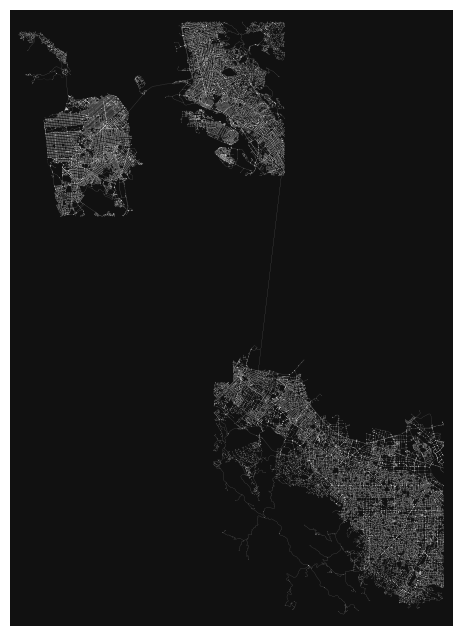

Visualization complete.


In [4]:
visualize_network(network=graph)

In [ ]:
import networkx as nx



# Define start and end coordinates for a trip

start_coords = (37.7749, -122.4194) # Downtown SF

end_coords = (37.4419, -122.1430)  # Palo Alto



# Find the closest nodes in your graph to these real-world coordinates

start_node = graph._find_nearest_node(start_coords[0], start_coords[1])

end_node = graph._find_nearest_node(end_coords[0], end_coords[1])



# Calculate the shortest path based on travel time

shortest_route_nodes = nx.shortest_path(graph,
                                        source=start_node,
                                        target=end_node,
                                        weight='travel_time')


In [ ]:
from pyvis.network import Network # type: ignore
import networkx as nx

# graph = your NetworkX graph
net = Network(height="800px", width="100%", notebook=True, cdn_resources='in_line')


# Add nodes and edges
for node, deg in graph.degree():
    net.add_node(node, size=deg)  # node size proportional to degree

for u, v in graph.edges():
    net.add_edge(u, v)

# Show interactive visualization in browser
net.show("network.html")

In [ ]:
# Calculate node degrees (how many connections each node has)
node_degrees = dict(graph.degree())
print("test")

# 1. Basic network visualization with node sizes based on degree
plt.figure(figsize=(10, 10))
nx.draw(graph, node_size=[v for v in node_degrees.values()], node_color='lightblue', edge_color='gray', alpha=0.7, with_labels=False)
plt.title("Network View (Node size = Degree)")
plt.show()

# 2. OSMnx detailed plot
ox.plot_graph(graph, node_size=10, edge_linewidth=0.5)


# 3. Degree distribution
degrees = [d for n, d in graph.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, alpha=0.75, color='skyblue')
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# 4. Edge density visualization
pos = nx.spring_layout(graph)
plt.figure(figsize=(10, 10))
nx.draw(graph, pos, node_size=5, node_color='red', edge_color='lightgray', alpha=0.6, with_labels=False)
plt.title("Edge Density View")
plt.show()

# Print additional network metrics
print("\nAdditional Network Metrics:")
print(f"Average node degree: {sum(degrees) / len(degrees):.2f}")
print(f"Network density: {nx.density(graph):.6f}")
try:
    print(f"Average shortest path length: {nx.average_shortest_path_length(graph):.2f}")
except:
    print("Note: Graph might not be fully connected for shortest path calculation")